## Soft Actor-Critic

### Value Iteration

In [1]:
import jax.numpy as jnp
import jax.random as jrandom

import jax

from src.systems.linear import StochasticDoubleIntegrator
from src.RL.PolicyGradient.SoftActorCritic.main import *

import numpy as np
import matplotlib.pyplot as plt


In [2]:
key = jrandom.PRNGKey(0)
buffer_size = 1000

# Init environment
x0 = jnp.array([2, 0])
SDI = StochasticDoubleIntegrator(x0)
SAC = SoftActorCritic(2, 1, key, buffer_size=buffer_size)

# Set learning rates
SAC.SVF.eta = 1e-1
SAC.SQF_1.eta = 1e-1
SAC.SQF_2.eta = 1e-1
SAC.PI.eta = 1e0

Nx = 10
x_space = np.linspace(-5, 5, Nx)
v_space = np.linspace(-5, 5, Nx)
u_space = np.linspace(-4, 4, 10)

def cost_to_normalized_reward(x):
    x = x/4.1
    return -min(x, 1)

for x in x_space:
    for v in v_space:
        state = jnp.array([x, v])
        for u in u_space:
            cost = SDI.cost(state, u)
            key, _ = jrandom.split(key)
            new_state = SDI.get_state_update(key, state, u)
            SAC.ReplayBuffer.store((state, u, cost_to_normalized_reward(cost), new_state))
            


In [5]:
key = jrandom.PRNGKey(0)
SAC.train(key, batch_size=50, n_epochs=400, show=True)
#cost_to_normalized_reward(0)


angle=0.366
angle=0.364
angle=0.362
angle=0.361
angle=0.358
angle=0.356
angle=0.354
angle=0.352
angle=0.350
angle=0.348
angle=0.345
angle=0.343
angle=0.341
angle=0.339
angle=0.337
angle=0.334
angle=0.332
angle=0.330
angle=0.328
angle=0.326
angle=0.323
angle=0.321
angle=0.319
angle=0.317
angle=0.315
angle=0.313
angle=0.311
angle=0.309
angle=0.306
angle=0.304
angle=0.301
angle=0.299
angle=0.297
angle=0.294
angle=0.292
angle=0.289
angle=0.287
angle=0.284
angle=0.282
angle=0.279
angle=0.277
angle=0.274
angle=0.272
angle=0.269
angle=0.267
angle=0.264
angle=0.262
angle=0.259
angle=0.256
angle=0.254
angle=0.251
angle=0.248
angle=0.244
angle=0.241
angle=0.238
angle=0.235
angle=0.231
angle=0.228
angle=0.225
angle=0.221
angle=0.218
angle=0.215
angle=0.212
angle=0.209
angle=0.205
angle=0.202
angle=0.199
angle=0.196
angle=0.193
angle=0.190
angle=0.187
angle=0.184
angle=0.181
angle=0.178
angle=0.175
angle=0.172
angle=0.169
angle=0.167
angle=0.164
angle=0.161
angle=0.159
angle=0.156
angle=0.153
angl

In [4]:
# key = jrandom.PRNGKey(0)
# for i in range(20):
#     SAC.train(key, batch_size=20, n_epochs=2, show=False)
#     print(SAC.PI.model.mu_layer.weight)



DeviceArray(-0.01234568, dtype=float32)

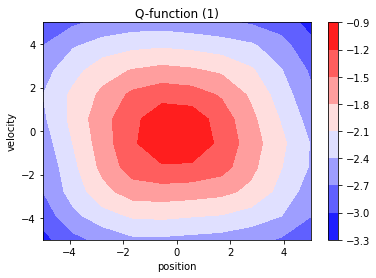

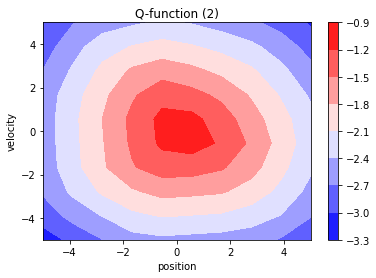

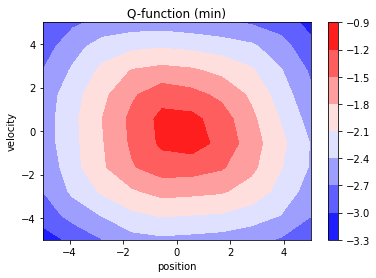

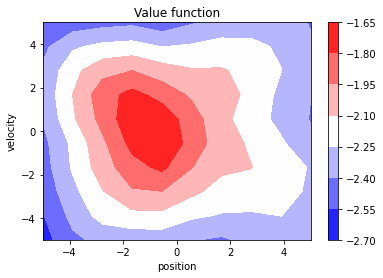

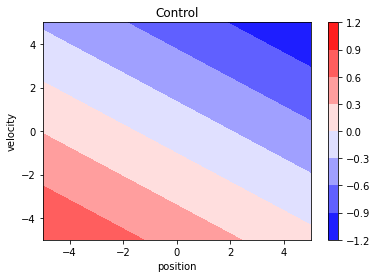

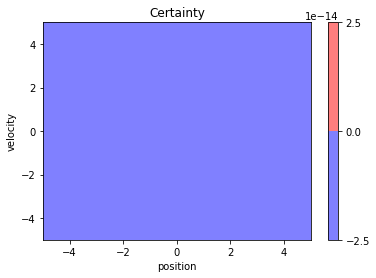

In [6]:
from matplotlib import cm
n=10
x = np.linspace(-5,5,n)
y = np.linspace(-5,5,n)
xv, yv = np.meshgrid(x,y)
zv = np.zeros((n, n))
zq = np.zeros((n, n))
zq1 = np.zeros((n,n))
zq2 = np.zeros((n,n))
zu = np.zeros((n, n))
zp = np.zeros((n, n))

Nu = 20
u_space = np.linspace(-4, 4, Nu)
Q = np.zeros(((n,n,Nu)))

for i in range(n):
    for j in range(n):
        for k in range(Nu):
            u = u_space[k]
            q1_val = SAC.SQF_1.predict(jnp.array([xv[i,j], yv[i,j]]), u)
            q2_val = SAC.SQF_2.predict(jnp.array([xv[i,j], yv[i,j]]), u)
            Q[i,j,k] = min(q1_val, q2_val)
        v_val = SAC.SVF.predict(jnp.array([xv[i,j], yv[i,j]]))
        q1_val = SAC.SQF_1.predict(jnp.array([xv[i,j], yv[i,j]]), 0)
        q2_val = SAC.SQF_2.predict(jnp.array([xv[i,j], yv[i,j]]), 0)
        q_val = min(q1_val, q2_val)
        u_val, log_prob = SAC.PI.get_control(jnp.array([xv[i,j], yv[i,j]]), key, deterministic=True)
        #_, u_val = SAC.get_control(jnp.array([xv[i,j], yv[i,j]]))
        zv[i,j] = v_val
        zu[i,j] = u_val
        zp[i,j] = log_prob
        zq[i,j] = q_val
        zq1[i,j] = q1_val
        zq2[i,j] = q2_val

plt.contourf(xv, yv, zq1, cmap=cm.bwr)
plt.xlabel('position')
plt.ylabel('velocity')
plt.colorbar()
plt.title('Q-function (1)')
plt.show()

plt.contourf(xv, yv, zq2, cmap=cm.bwr)
plt.xlabel('position')
plt.ylabel('velocity')
plt.colorbar()
plt.title('Q-function (2)')
plt.show()

plt.contourf(xv, yv, zq, cmap=cm.bwr)
plt.xlabel('position')
plt.ylabel('velocity')
plt.colorbar()
plt.title('Q-function (min)')
plt.show()

plt.contourf(xv, yv, zv, cmap=cm.bwr)
plt.xlabel('position')
plt.ylabel('velocity')
plt.colorbar()
plt.title('Value function')
plt.show()

plt.contourf(xv, yv, zu, cmap=cm.bwr)
plt.xlabel('position')
plt.ylabel('velocity')
plt.colorbar()
plt.title('Control')
plt.show()

plt.contourf(xv, yv, zp, cmap=cm.bwr)
plt.xlabel('position')
plt.ylabel('velocity')
plt.colorbar()
plt.title('Certainty')
plt.show()



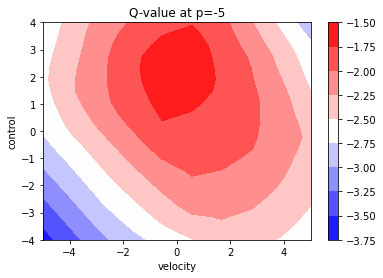

In [8]:
uw, yw = np.meshgrid(u_space, y)

plt.contourf(yw, uw, Q[0,:,:], cmap=cm.bwr)
plt.xlabel('velocity')
plt.ylabel('control')
plt.colorbar()
plt.title('Q-value at p=-5')
plt.show()


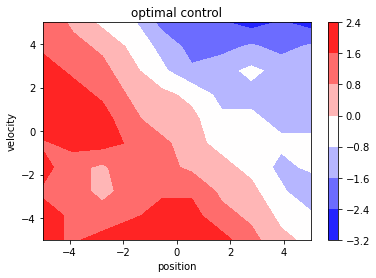

In [9]:
Q_idx = np.argmax(Q, axis=2)
Qu = np.zeros_like(Q_idx, dtype=np.float32)
for i, row in enumerate(Q_idx):
    for j, item in enumerate(row):
        Qu[i,j] = u_space[item]

plt.contourf(xv, yv, Qu, cmap=cm.bwr)
plt.xlabel('position')
plt.ylabel('velocity')
plt.colorbar()
plt.title('optimal control')
plt.show()